## Загрузим нужные библиотеки

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

Выполним загрузу датсета

In [2]:
df_train = pd.read_csv("./content/train.csv", index_col= 0)

## Проанализируем датасет

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7000 non-null   object 
 1   publish_date        7000 non-null   object 
 2   session             7000 non-null   object 
 3   authors             7000 non-null   object 
 4   ctr                 7000 non-null   float64
 5   category            7000 non-null   object 
 6   tags                7000 non-null   object 
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 601.6+ KB


Заменим категорию и автора на число

In [4]:
def AddFitch(df):
    df["category"] = df["category"].astype('category')
    df["category"] = df["category"].cat.codes
    df["category"] = df["category"].astype('int')
    df["authors"] = df["authors"].astype('category')
    df["authors"] = df["authors"].cat.codes
    df["authors"] = df["authors"].astype('int')
    
    df['publish_date'] = pd.to_datetime(df['publish_date'])
    df['day'] = df['publish_date'].dt.strftime("%d").astype(int)
    df['mounth'] = df['publish_date'].dt.strftime("%m").astype(int)
    df['hour'] = df['publish_date'].dt.strftime("%H").astype(int)
    df['weekday'] = df['publish_date'].dt.dayofweek
    return df

In [5]:
df_train = AddFitch(df_train)

In [6]:
# df_train["category"] = df_train["category"].astype('category')
# df_train["category"] = df_train["category"].cat.codes
# df_train["category"] = df_train["category"].astype('int')

In [7]:
# df_train["authors"] = df_train["authors"].astype('category')
# df_train["authors"] = df_train["authors"].cat.codes
# df_train["authors"] = df_train["authors"].astype('int')

In [8]:
# df_train['publish_date'] = pd.to_datetime(df_train['publish_date'])
# df_train['day'] = df_train['publish_date'].dt.strftime("%d").astype(int)
# df_train['mounth'] = df_train['publish_date'].dt.strftime("%m").astype(int)
# df_train['hour'] = df_train['publish_date'].dt.strftime("%H").astype(int)
# df_train['weekday'] = df_train['publish_date'].dt.dayofweek

In [9]:
df_train.head(3)

,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent,day,mounth,hour,weekday
document_id,,,,,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,Европейский банк развития приостановил доступ ...,2022-04-04 10:29:44,IDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,"['55928d339a794751dc8303d6', '542d1e28cbb20f86...",20460,1.134,35.850,4,4,10,0
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,Кремль назвал регулярным процессом учебные зап...,2022-02-18 10:00:39,KtVJsteHStO5oditt3Uvzw,38,1.853,0,"['549d25df9a794775979561d2', '58abcf539a7947f1...",19038,1.142,38.355,18,2,10,4
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,Госсекретарь Швеции заявила о нежелании вступа...,2022-02-12 04:24:02,hk7puWJwSziw0m3sfTkKWA,560,0.000,0,"['5430f451cbb20f73931ecd05', '5409f15de063daa0...",51151,1.185,36.424,12,2,4,5


In [10]:
len(df_train['authors'].unique())

561

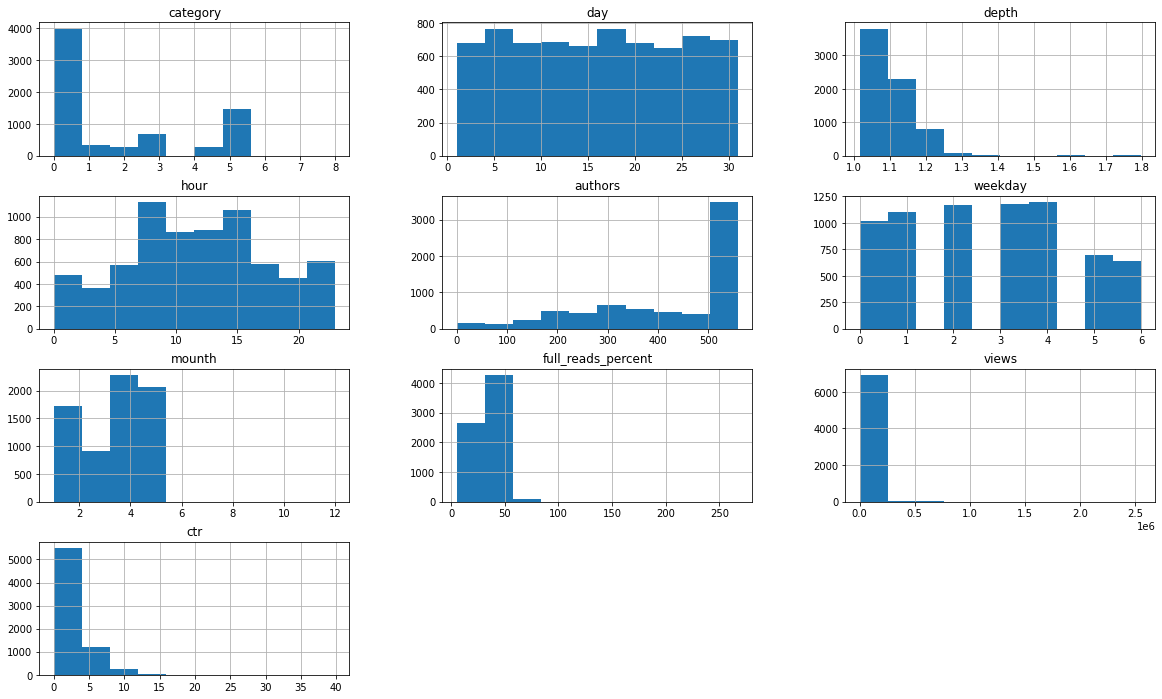

In [11]:
features = list(set(df_train.columns) - set(['publish_date']))

_ = df_train[features].hist(figsize=(20,12))

Всего 9 категорий статей

In [12]:
df_train.category.value_counts()

0    3988
5    1456
3     667
1     338
4     283
2     265
7       1
6       1
8       1
Name: category, dtype: int64

Рассмотрим заголовки

In [13]:
all_headlines = df_train['title']
all_headlines.value_counts()

Какие места на Украине взяли под контроль российские военные. Карта                                                                                                                10
Как менялась ключевая ставка ЦБ за последние годы. Инфографика                                                                                                                      7
Как Запад и Россия поставили рекорд по высылкам дипломатов. Инфографика                                                                                                             6
Какие приграничные пункты попали под обстрел со стороны Украины. Карта                                                                                                              5
Какие регионы объявили высокий уровень террористической опасности. Карта                                                                                                            4
                                                                                          

In [14]:
all_headlines = df_train['title']
all_headlines

document_id
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ    Европейский банк развития приостановил доступ ...
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw    Кремль назвал регулярным процессом учебные зап...
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA    Госсекретарь Швеции заявила о нежелании вступа...
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w    Песков назвал прагматичной выдачу лицензии Газ...
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg    В Хабаровске задержали главу филиала РАНХиГС п...
                                                                        ...                        
61fd479c9a7947848183694751RC_1i5QlGuv7B2FzwTjw    Открытие Олимпиады, новые китайские контракты ...
628a8f1c9a79478c64a7dae450tIkSGVSf2O8XQgk_uaHQ    Саудовская Аравия выразила надежду на соглашен...
6244cf5e9a79479099346b26tKlqoxQYSmij0ZBrGzebug    Брюс Уиллис завершит актерскую карьеру из-за б...
627303699a794749b8116abc12JX_3ZDTDu2XHF3k2eJVg    Экс-посол Франции назвал болезненным д

In [15]:
# !pip install tensorflow

In [16]:
import re

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    return text_nonum
clean_text(all_headlines[-2])

'Экс-посол Франции назвал болезненным для Европы отказ от российской нефти\n                \n                                                    \n\n    \n\n    Экономика,\xa0:'

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the words in our headlines
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_headlines)
total_words = len(tokenizer.word_index) + 1
print('Всего слов: ', total_words)

2022-07-21 23:20:33.924557: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-21 23:20:33.924590: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Всего слов:  15167


In [18]:
# Convert data to sequence of tokens 
input_sequences = []
for line in all_headlines:
    # Convert our headline into a sequence of tokens
    token_list = tokenizer.texts_to_sequences([line])[0]
    # Create a sequences for each headline
    input_sequences.append(token_list)

print(tokenizer.sequences_to_texts(input_sequences[:5]))
input_sequences[:5]

['европейский банк развития приостановил доступ москвы и минска к финансам', 'кремль назвал регулярным процессом учебные запуски баллистических ракет', 'госсекретарь швеции заявила о нежелании вступать в нато из за украины политика \xa007 24', 'песков назвал прагматичной выдачу лицензии газпромбанку на платежи за газ политика \xa016 24', 'в хабаровске задержали главу филиала ранхигс по обвинению в мошенничестве общество \xa013 42']


[[2115, 443, 1095, 1250, 444, 105, 5, 2729, 23, 6009],
 [107, 20, 6010, 6011, 3771, 6012, 2116, 559],
 [2117, 287, 91, 2, 1096, 3772, 1, 29, 9, 10, 18, 3, 103, 168],
 [54, 20, 6013, 983, 1097, 3773, 4, 1098, 10, 110, 3, 34, 168],
 [1, 2730, 248, 445, 2731, 6014, 11, 2732, 1, 1099, 8, 26, 193]]

In [19]:
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len


28

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 2115,  443, 1095, 1250,
        444,  105,    5, 2729,   23, 6009], dtype=int32)

In [258]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow import keras

# Input is max sequence length - 1, as we've removed the last word for the label
input_len = max_sequence_len

# model = Sequential()
# model.add(Embedding(total_words, 10, input_length=input_len))
# model.add(LSTM(100))
# model.add(Dropout(0.1))
# model.add(Dense(3, activation='softmax'))

a_input= Input(shape=(input_len), name="input_a")
b_input = Input(shape=(3,), name="input_b")

a_lstm = Embedding(total_words, 10, input_length=input_len)(a_input)
a_lstm = LSTM(100, name="lstm", input_shape=(1, input_len))(a_lstm)
a_lstm = Dropout(0.1, name="dropout")(a_lstm)
a_lstm = Dense(3, activation='softmax')(a_lstm)

a_b = concatenate([a_lstm, b_input],name="concatenated_layer")
output_layer = Dense(3, activation = "sigmoid", name = "output_layer")(a_b)
model = Model(inputs=[(a_input,b_input)],outputs=[output_layer], name = "merged_model")
# model = Model(inputs=a_input,outputs=[a_lstm], name = "merged_model")

# keras.utils.plot_model(model, "output/architecture.png", show_shapes=True)
# bl_1 = Dense(64, activation="relu",name ="b_layer_1")(b_reg)

model.summary()

Model: "merged_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_a (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 28, 10)       151670      ['input_a[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 100)          44400       ['embedding_10[0][0]']           
                                                                                                  
 dropout (Dropout)              (None, 100)          0           ['lstm[0][0]']                   
                                                                                       

In [259]:
df_train.columns

Index(['title', 'publish_date', 'session', 'authors', 'ctr', 'category',
       'tags', 'views', 'depth', 'full_reads_percent', 'day', 'mounth', 'hour',
       'weekday', 'v_max', 'd_max', 'r_max', 'views_p', 'depth_p', 'reads_p',
       'vp_max', 'dp_max', 'rp_max'],
      dtype='object')

In [260]:
# from tensorflow.keras.layers import Input, Embedding, concatenate, Dense, DenseFeatures
# # from tensorflow import feature_column

# import deep

# input_tensor = {
#     "title": Input(name="title", shape=(max_sequence_len,), dtype="int64"),
#     "views": Input(name="views", shape=(1,), dtype="int64"),
# }

In [261]:
# def get_deep(
#     input_tensor,
#     numerical_columns,
#     embedding_size=32,
# ):
# #     FIXME_A = one_hot_columns
# #     FIXME_D = ratings
# #     FIXME_E = multi_hot_columns
# #     FIXME_F = embedding_size

#     # Get One-hot embeddings
#     embedding_inputs = 'title'

#     # Get numerical layers to concatenate with embeddings
#     numerical_layers = [input_tensor[col] for col in numerical_columns]

#     # Get multihot embeddings
#     multihot_emb = Embedding(total_words, embedding_size, input_length=input_len))
# #     multihot_emb_ids = [multihot_emb(FIXME_B[col]) for col in FIXME_E]
# #     multihot_emb_stack = tf.keras.backend.stack(multihot_emb_ids, axis=2)
# #     multihot_emb_avg = tf.squeeze(tf.keras.backend.mean(multihot_emb_stack, axis=2), axis=1)

#     concatenate_layers = numerical_layers + [multihot_emb]
#     output_tensor_deep = deep.get_model(
#         embedding_inputs=embedding_inputs, concatenate_layers=concatenate_layers
#     )
#     return tf.keras.Model(input_tensor, output_tensor_deep), output_tensor_deep

In [262]:
# model, output_tensor_deep = get_deep(input_tensor, ['views'])

In [263]:
# !pip install pydot
# !pip install graphviz

In [264]:
# import tensorflow as tf
model.summary()

# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "merged_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_a (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 28, 10)       151670      ['input_a[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 100)          44400       ['embedding_10[0][0]']           
                                                                                                  
 dropout (Dropout)              (None, 100)          0           ['lstm[0][0]']                   
                                                                                       

In [265]:
model.compile(loss='mse', optimizer='adam')

In [274]:
df_train[["views","depth","full_reads_percent"]]

view_max = df_train["views"].max()
depth_max = df_train["depth"].max()
full_read_max = df_train["full_reads_percent"].max()

df_train['v_max'] = df_train["views"] / view_max
df_train['d_max'] = df_train["depth"] / depth_max
df_train['r_max'] = df_train["full_reads_percent"] / full_read_max
df_train['vp_max'] = df_train["views_p"] / view_max
df_train['dp_max'] = df_train["depth_p"] / depth_max
df_train['rp_max'] = df_train["reads_p"] / full_read_max

In [275]:
predictors = np.array(input_sequences)
labels_reg = df_train[["vp_max","dp_max","rp_max"]].reset_index(drop = True).values
labels = df_train[["v_max","d_max","r_max"]].reset_index(drop = True).values
# labels = np.array(labels)
print(len(labels))
print(len(predictors))
print(labels[:5])
# print(predictors[:5])

7000
7000
[[0.00801032 0.63035019 0.1339571 ]
 [0.00745359 0.63479711 0.14331728]
 [0.0200262  0.65869928 0.1361019 ]
 [0.0014807  0.58532518 0.11272947]
 [0.00119998 0.59088382 0.12934987]]


In [276]:
model.fit([predictors,labels_reg], labels, epochs=5, verbose=1, validation_split=0.1)

Epoch 1/5
197/197 [==============================] - 3s 17ms/step - loss: 0.0294 - val_loss: 0.0110
Epoch 2/5
197/197 [==============================] - 3s 18ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 3/5
197/197 [==============================] - 4s 18ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 4/5
197/197 [==============================] - 4s 18ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 5/5
197/197 [==============================] - 3s 15ms/step - loss: 0.0028 - val_loss: 0.0027


In [277]:
model.predict([predictors, labels_reg], verbose=0)

array([[0.06375711, 0.61456484, 0.13702478],
       [0.06343756, 0.6161957 , 0.13649161],
       [0.06298289, 0.6117864 , 0.13717759],
       ...,
       [0.06653135, 0.6112884 , 0.13843237],
       [0.06466131, 0.6214028 , 0.1355244 ],
       [0.06681544, 0.61696   , 0.13722222]], dtype=float32)

In [237]:
def MakePrediction(model, seed_text, reg_res):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
    prediction = model.predict([token_list, reg_res], verbose=0)[0]
    
    return prediction

In [238]:
df_train[:5]

,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent,...,weekday,v_max,d_max,r_max,views_p,depth_p,reads_p,vp_max,dp_max,rp_max
document_id,,,,,,,,,,,,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,Европейский банк развития приостановил доступ ...,2022-04-04 10:29:44,IDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,"['55928d339a794751dc8303d6', '542d1e28cbb20f86...",20460,1.134,35.850,...,0,0.008010,0.630350,0.133957,NaN,NaN,NaN,NaN,NaN,NaN
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,Кремль назвал регулярным процессом учебные зап...,2022-02-18 10:00:39,KtVJsteHStO5oditt3Uvzw,38,1.853,0,"['549d25df9a794775979561d2', '58abcf539a7947f1...",19038,1.142,38.355,...,4,0.007454,0.634797,0.143317,NaN,NaN,NaN,NaN,NaN,NaN
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,Госсекретарь Швеции заявила о нежелании вступа...,2022-02-12 04:24:02,hk7puWJwSziw0m3sfTkKWA,560,0.000,0,"['5430f451cbb20f73931ecd05', '5409f15de063daa0...",51151,1.185,36.424,...,5,0.020026,0.658699,0.136102,NaN,NaN,NaN,NaN,NaN,NaN
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w,Песков назвал прагматичной выдачу лицензии Газ...,2022-04-22 13:24:55,7UKY2SSZTjCcjhwBzxw37w,560,0.000,0,"['5409f297e063daa0f408b11c', '545caa9ecbb20f36...",3782,1.053,30.169,...,4,0.001481,0.585325,0.112729,NaN,NaN,NaN,NaN,NaN,NaN
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg,В Хабаровске задержали главу филиала РАНХиГС п...,2022-04-25 10:42:23,wuMYES90REuV5YhrN75IXg,560,0.000,5,"['5409f42ae063daa0f408b5d7', '585c20e19a79470e...",3065,1.063,34.617,...,0,0.001200,0.590884,0.129350,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
prediction = MakePrediction(model, df_train['title'].values[0], df_train[["v_max","d_max","r_max"]].values[0])
prediction[0] = prediction[0] * view_max
prediction[1] = prediction[1] * depth_max
prediction[2] = prediction[2] * full_read_max
prediction

ValueError: Data cardinality is ambiguous:
  x sizes: 1, 3
Make sure all arrays contain the same number of samples.

In [190]:
predictions = []
for title in df_train['title'].values:
    prediction = MakePrediction(model, title)
    predictions.append(prediction)
df_pred = pd.DataFrame(np.concatenate(predictions).reshape(-1, 3))

df_pred[0] = df_pred[0] * view_max
df_pred[1] = df_pred[1] * depth_max
df_pred[2] = df_pred[2] * full_read_max

df_pred.head()

,0,1,2
0,212393.212774,1.234483,61.724644
1,190643.441686,1.246570,62.205502
2,211398.574970,1.258625,58.237457
3,231635.912746,1.213206,62.873672
4,244112.026995,1.209250,62.154980
...,...,...,...
6995,242791.818771,1.287622,50.634487
6996,247719.506338,1.199172,63.276192
6997,158066.589174,1.244552,65.918961
6998,186581.328409,1.215579,67.241417


In [192]:
df_pred = df_pred.rename(columns={0: "views", 1: "depth", 2: "full_reads_percent"})
df_pred.index = df_train.index

In [195]:
score_views = r2_score(y["views"], df_pred['views'])
score_depth = r2_score(y["depth"], df_pred['depth'])
score_frp = r2_score(y["full_reads_percent"], df_pred['full_reads_percent'])

score = 0.4 * score_views + 0.3 * score_depth + 0.3 * score_frp

score

-4.189297294478216

In [196]:
df_pred

,views,depth,full_reads_percent
document_id,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,212393.212774,1.234483,61.724644
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,190643.441686,1.246570,62.205502
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,211398.574970,1.258625,58.237457
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w,231635.912746,1.213206,62.873672
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg,244112.026995,1.209250,62.154980
...,...,...,...
61fd479c9a7947848183694751RC_1i5QlGuv7B2FzwTjw,242791.818771,1.287622,50.634487
628a8f1c9a79478c64a7dae450tIkSGVSf2O8XQgk_uaHQ,247719.506338,1.199172,63.276192
6244cf5e9a79479099346b26tKlqoxQYSmij0ZBrGzebug,158066.589174,1.244552,65.918961


In [171]:
# subset_dict = {key: value for key, value in tokenizer.word_index.items() \
#                if key in ['украина',',','политика','россия','сша','Банк','украине', '54', 'байден']}
# print(subset_dict)

In [172]:
# for line in all_headlines:
    # Convert our headline into a sequence of tokens
# token_list = tokenizer.texts_to_sequences([all_headlines[-2]])[0]

# print(tokenizer.sequences_to_texts([token_list]))
# token_list

# Обучаем модель

In [214]:
X = df_train.drop(["views","depth","full_reads_percent","title","publish_date", "session", "tags", 'views_p', 'depth_p', ''], axis = 1)
y = df_train[["views","depth","full_reads_percent"]]

In [215]:
X.head()

,authors,ctr,category,day,mounth,hour,weekday,v_max,d_max,r_max
document_id,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,4,4,10,0,0.008010,0.630350,0.133957
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,38,1.853,0,18,2,10,4,0.007454,0.634797,0.143317
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,560,0.000,0,12,2,4,5,0.020026,0.658699,0.136102
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w,560,0.000,0,22,4,13,4,0.001481,0.585325,0.112729
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg,560,0.000,5,25,4,10,0,0.001200,0.590884,0.129350


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Подбор модели

In [217]:
def ModelCreation(X, Y):
    model = RandomForestRegressor(random_state=0)
    model.fit(X, Y)
    return model

In [218]:
regr = ModelCreation(X_train, y_train)

In [251]:
pred = regr.predict(X)
df_train['views_p'], df_train['depth_p'], df_train['reads_p'] = pred[:,0], pred[:,1], pred[:,2]

Предскажем значения

In [249]:
pred = regr.predict(X_test)
score_views = r2_score(y_test["views"], pred[:,0])
score_depth = r2_score(y_test["depth"], pred[:,1])
score_frp = r2_score(y_test["full_reads_percent"], pred[:,2])

In [250]:
score = 0.4 * score_views + 0.3 * score_depth + 0.3 * score_frp

score

0.5989384819946123

## Оценка точности

In [185]:
regr = ModelCreation(X, y)

In [186]:
df_test = pd.read_csv("./content/test.csv", index_col= 0)

In [187]:
df_test = AddFitch(df_test)
# X_test = XSplit(df_test)
X_test = df_test.drop(["title","publish_date", "session", "tags"], axis = 1)
pred = regr.predict(X_test)

In [188]:
submission = pd.DataFrame()
submission['views'] = pred[:,0]
submission['depth'] = pred[:,1]
submission['full_reads_percent'] = pred[:,2]
submission.index = df_test.index

submission.to_csv('submission.csv')

In [189]:
submission

,views,depth,full_reads_percent
document_id,,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,16953.341167,1.173984,40.332758
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,14185.550000,1.055250,32.562330
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,11110.210000,1.065850,30.788830
628618629a7947d4927eb812upfii3whSSuMXCqcqF8VbQ,7868.918000,1.066882,30.035280
620e76109a7947235623695b5hzCiIHdSYKQIr8WAM18bw,170829.290000,1.143120,36.005080
...,...,...,...
623ba6bc9a79470214cb9418x4OZQ1IjTb27nPAgv5wAZg,42720.750000,1.148430,33.826770
624fda1f9a79471a9bd102eetuRTrLPGSZyNbc9_YcBAeQ,56034.670000,1.135110,28.959050
6257a6a99a79477eea75b86dtBr3UG9ORW-gOybkVKX6ww,12984.260000,1.068410,34.947530


In [122]:
df_test

,title,publish_date,session,authors,ctr,category,tags,day,mounth,hour,weekday
document_id,,,,,,,,,,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,«Крайне провокационная тема»: как Россия и США...,2022-02-01 17:02:44,J0AvX96vTAaQCiWVbzoMdw,325,0.000,0,"['58ca77679a794700b1e37f0a', '5409f1b7e063daa0...",1,2,17,1
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,Власти Херсонской области пообещали сделать ру...,2022-05-24 00:50:55,QS5CqzXYRnmDdR2LaSreEw,325,1.598,0,"['5433603acbb20f6e5def0cc5', '5409f420e063daa0...",24,5,0,1
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,Премьер и президент Финляндии призвали срочно ...,2022-05-12 07:11:51,XVsoyrUOT8OJJg2_finJhw,325,2.006,0,"['5409f270e063daa0f408b0a7', '5409f196e063daa0...",12,5,7,3
628618629a7947d4927eb812upfii3whSSuMXCqcqF8VbQ,В Госдуму внесли проект о временных администра...,2022-05-19 11:54:35,upfii3whSSuMXCqcqF8VbQ,325,0.000,0,"['5409f145e063daa0f408ad35', '5409f30fe063daa0...",19,5,11,3
620e76109a7947235623695b5hzCiIHdSYKQIr8WAM18bw,Блинкен заявил в ООН о готовности России начат...,2022-02-17 16:28:55,5hzCiIHdSYKQIr8WAM18bw,217,9.136,0,"['5409f15de063daa0f408ada8', '545d4dcdcbb20fbc...",17,2,16,3
...,...,...,...,...,...,...,...,...,...,...,...
623ba6bc9a79470214cb9418x4OZQ1IjTb27nPAgv5wAZg,Суд не стал публиковать решение о запрете Face...,2022-03-23 23:28:34,x4OZQ1IjTb27nPAgv5wAZg,164,1.788,4,"['5409f289e063daa0f408b0da', '54289bd7cbb20f85...",23,3,23,2
624fda1f9a79471a9bd102eetuRTrLPGSZyNbc9_YcBAeQ,ИT-компания EPAM объявила об уходе из России,2022-04-08 08:07:17,tuRTrLPGSZyNbc9_YcBAeQ,188,4.427,3,"['546240cdcbb20f8a5c90571b', '5409f3e8e063daa0...",8,4,8,4
6257a6a99a79477eea75b86dtBr3UG9ORW-gOybkVKX6ww,МИД сообщил о желании стран ЕАЭС отказаться от...,2022-04-14 05:18:59,tBr3UG9ORW-gOybkVKX6ww,325,0.000,1,"['5409f1a3e063daa0f408ae98', '5437f9eccbb20f61...",14,4,5,3
